#**Exponential smoothing**



##  install these libraries using pip:



In [106]:
!pip install pandas matplotlib

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [109]:
data = pd.read_csv('traffic.csv', index_col=0, parse_dates=True)
data

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


In [119]:
df= data['Vehicles']
df

DateTime
2015-11-01 00:00:00    15
2015-11-01 01:00:00    13
2015-11-01 02:00:00    10
2015-11-01 03:00:00     7
2015-11-01 04:00:00     9
                       ..
2017-06-30 19:00:00    11
2017-06-30 20:00:00    30
2017-06-30 21:00:00    16
2017-06-30 22:00:00    22
2017-06-30 23:00:00    12
Name: Vehicles, Length: 48120, dtype: int64

In [127]:
df2=df[:1000]

## Visualizing the data





<Axes: xlabel='DateTime'>

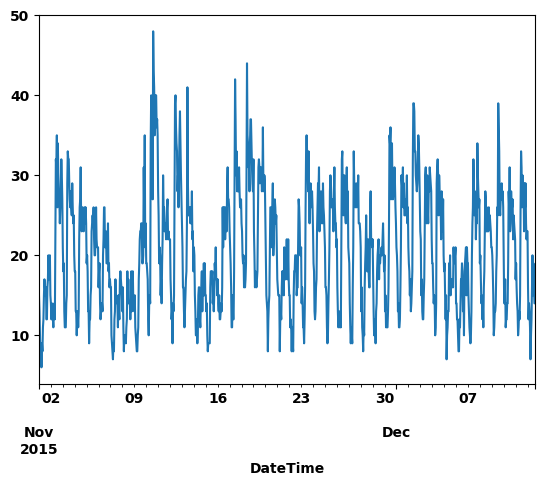

In [128]:
df2.plot()

#**Single Exponential smoothing**





In [129]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(df2)
model_single_fit = model.fit()

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions





In [130]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)

2015-12-12 16:00:00    14.000196
2015-12-12 17:00:00    14.000196
2015-12-12 18:00:00    14.000196
2015-12-12 19:00:00    14.000196
2015-12-12 20:00:00    14.000196
2015-12-12 21:00:00    14.000196
Freq: H, dtype: float64


## Visualize Single Exponential Smoothing




In [131]:
forecast_single = model_single_fit.forecast(40)

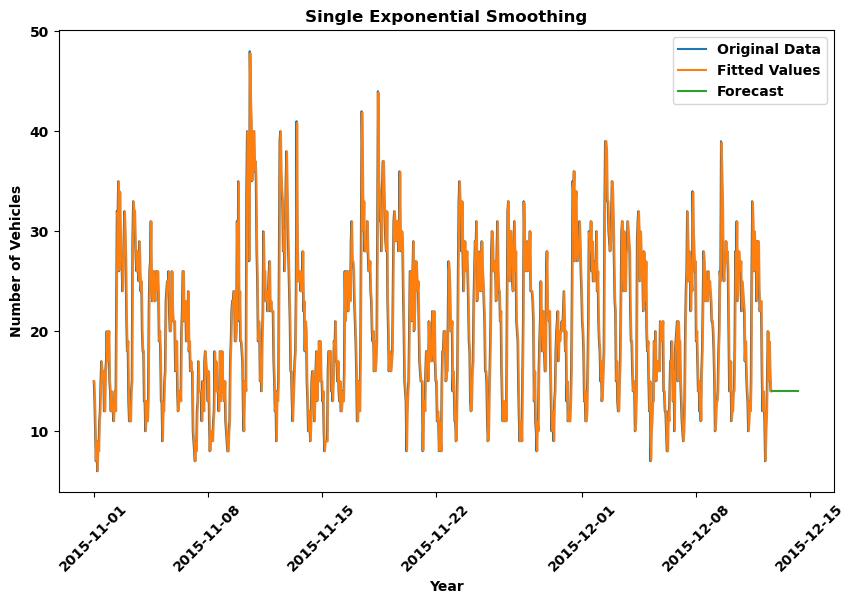

In [132]:
plt.figure(figsize=(10,6))
plt.plot(df2, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.xticks(rotation=45)
plt.show()


#**Double Exponential Smoothing**




In [133]:
from statsmodels.tsa.api import Holt

model_double = Holt(df2)
model_double_fit = model_double.fit()


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [134]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)

2015-12-12 16:00:00    13.923808
2015-12-12 17:00:00    13.847659
2015-12-12 18:00:00    13.771510
2015-12-12 19:00:00    13.695361
2015-12-12 20:00:00    13.619212
2015-12-12 21:00:00    13.543063
Freq: H, dtype: float64


## Visualize Double Exponential Smoothing




In [135]:
forecast_double = model_double_fit.forecast(40)


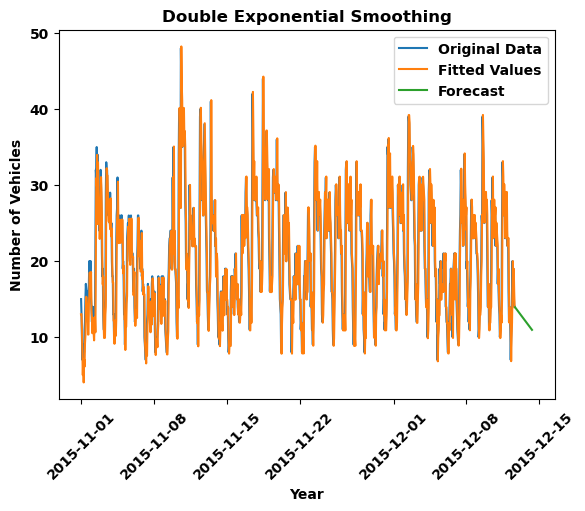

In [138]:
plt.plot(df2, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Double Exponential Smoothing')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#**Holt-Winter’s Seasonal Smoothing**






In [140]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    df2, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [141]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

2015-12-12 16:00:00    12.493624
2015-12-12 17:00:00    11.577899
2015-12-12 18:00:00    12.781961
2015-12-12 19:00:00    14.275633
2015-12-12 20:00:00    14.985942
2015-12-12 21:00:00    17.215220
Freq: H, dtype: float64


## Visualize Triple Exponential Smoothing




In [142]:
forecast_triple = model_triple_fit.forecast(40)

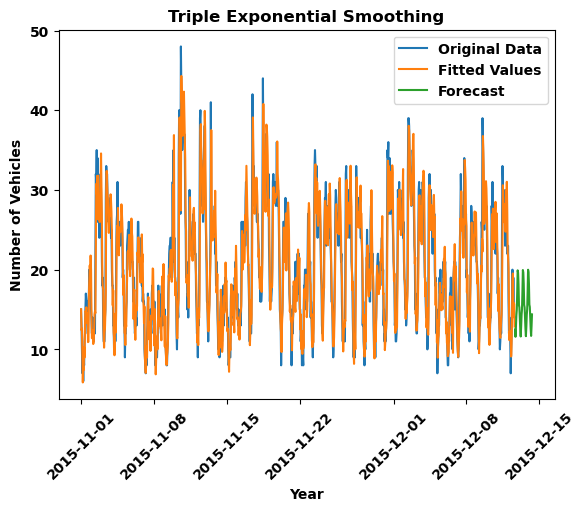

In [144]:
plt.plot(df2, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.xticks(rotation=45)
plt.show()


##**Well done :)**